# Simple CNN

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Train Acc: 52.80%, Val Acc: 61.94%
Epoch 2/10, Train Acc: 67.31%, Val Acc: 68.05%
Epoch 3/10, Train Acc: 73.75%, Val Acc: 71.41%
Epoch 4/10, Train Acc: 78.29%, Val Acc: 71.28%
Epoch 5/10, Train Acc: 82.98%, Val Acc: 72.37%
Epoch 6/10, Train Acc: 87.04%, Val Acc: 73.74%
Epoch 7/10, Train Acc: 90.66%, Val Acc: 73.54%
Epoch 8/10, Train Acc: 93.77%, Val Acc: 72.41%
Epoch 9/10, Train Acc: 95.59%, Val Acc: 72.48%
Epoch 10/10, Train Acc: 96.78%, Val Acc: 72.40%


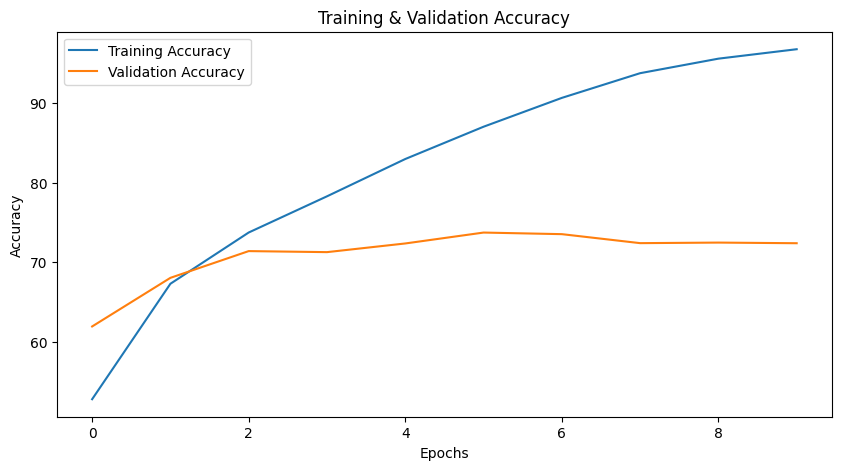

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.001

# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training and Evaluation
DEVICE = torch.device("mps")
model = SimpleCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    model.train()
    correct_train = 0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()

    train_acc = 100. * correct_train / len(train_dataset)
    train_accuracies.append(train_acc)

    model.eval()
    correct_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct_val += predicted.eq(labels).sum().item()

    val_acc = 100. * correct_val / len(val_dataset)
    val_accuracies.append(val_acc)
    print(f'Epoch {epoch+1}/{EPOCHS}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')

# Plotting
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


# improved simple CNN 1

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30, Train Acc: 37.41%, Val Acc: 50.64%
Epoch 2/30, Train Acc: 51.43%, Val Acc: 60.86%
Epoch 3/30, Train Acc: 58.04%, Val Acc: 63.21%
Epoch 4/30, Train Acc: 62.89%, Val Acc: 67.46%
Epoch 5/30, Train Acc: 65.59%, Val Acc: 71.39%
Epoch 6/30, Train Acc: 67.91%, Val Acc: 72.35%
Epoch 7/30, Train Acc: 69.32%, Val Acc: 73.63%
Epoch 8/30, Train Acc: 70.59%, Val Acc: 73.84%
Epoch 9/30, Train Acc: 71.32%, Val Acc: 75.41%
Epoch 10/30, Train Acc: 72.46%, Val Acc: 75.26%
Epoch 11/30, Train Acc: 73.18%, Val Acc: 74.87%
Epoch 12/30, Train Acc: 73.91%, Val Acc: 76.50%
Epoch 13/30, Train Acc: 74.45%, Val Acc: 77.97%
Epoch 14/30, Train Acc: 74.88%, Val Acc: 77.09%
Epoch 15/30, Train Acc: 75.57%, Val Acc: 77.04%
Epoch 16/30, Train Acc: 75.61%, Val Acc: 77.54%
Epoch 17/30, Train Acc: 76.12%, Val Acc: 78.03%
Epoch 18/30, Train Acc: 76.72%, Val Acc: 77.98%
Epoch 19/30, Train Acc: 76.88%, Val Acc: 78.79%
Epoch 20/30, Train Ac

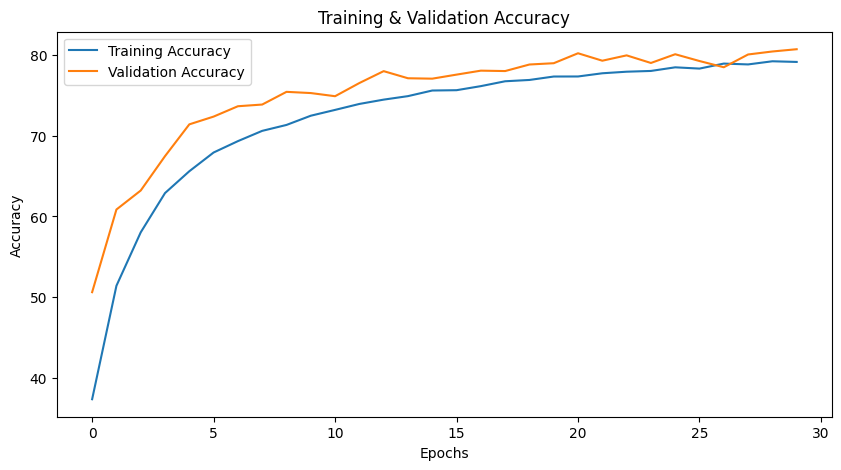

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 64
LR = 0.001
WEIGHT_DECAY = 5e-4

# Data Preparation with Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Modified Simple CNN Model
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Training and Evaluation
DEVICE = torch.device("mps")
model = ModifiedCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    model.train()
    correct_train = 0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()

    train_acc = 100. * correct_train / len(train_dataset)
    train_accuracies.append(train_acc)

    model.eval()
    correct_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct_val += predicted.eq(labels).sum().item()

    val_acc = 100. * correct_val / len(val_dataset)
    val_accuracies.append(val_acc)
    print(f'Epoch {epoch+1}/{EPOCHS}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')

# Plotting
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


# improved CNN 2

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/100, Train Acc: 19.57%, Val Acc: 26.32%
Epoch 2/100, Train Acc: 25.46%, Val Acc: 37.68%
Epoch 3/100, Train Acc: 32.76%, Val Acc: 43.51%
Epoch 4/100, Train Acc: 37.10%, Val Acc: 48.10%
Epoch 5/100, Train Acc: 40.98%, Val Acc: 50.43%
Epoch 6/100, Train Acc: 44.70%, Val Acc: 56.83%
Epoch 7/100, Train Acc: 48.38%, Val Acc: 59.29%
Epoch 8/100, Train Acc: 51.20%, Val Acc: 62.14%
Epoch 9/100, Train Acc: 54.07%, Val Acc: 63.35%
Epoch 10/100, Train Acc: 56.55%, Val Acc: 64.84%
Epoch 11/100, Train Acc: 58.50%, Val Acc: 65.56%
Epoch 12/100, Train Acc: 60.61%, Val Acc: 66.89%
Epoch 13/100, Train Acc: 62.21%, Val Acc: 69.68%
Epoch 14/100, Train Acc: 63.63%, Val Acc: 71.54%
Epoch 15/100, Train Acc: 64.74%, Val Acc: 72.62%
Epoch 16/100, Train Acc: 66.09%, Val Acc: 73.29%
Epoch 17/100, Train Acc: 67.37%, Val Acc: 75.02%
Epoch 18/100, Train Acc: 68.12%, Val Acc: 75.87%
Epoch 19/100, Train Acc: 69.31%, Val Acc: 76.40%
Ep

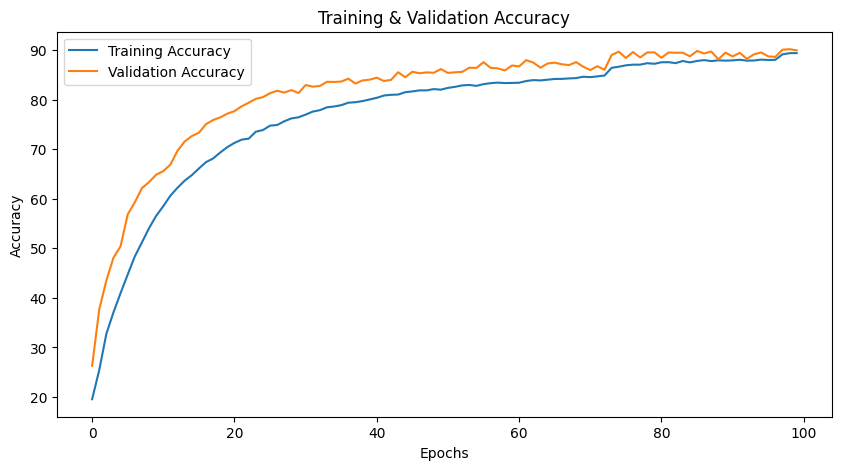

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 128
LR = 0.01
WEIGHT_DECAY = 5e-4
MOMENTUM = 0.9

# Data Preparation with Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Deeper CNN Model with Batch Normalization
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.5),
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(512 * 8 * 8, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

# Training and Evaluation
DEVICE = torch.device("mps")
model = DeeperCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY, momentum=MOMENTUM)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', factor=0.5, patience=10, verbose=True)

train_accuracies, val_accuracies = [], []

for epoch in range(EPOCHS):
    model.train()
    correct_train = 0
    for images, labels in train_loader:
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()

    train_acc = 100. * correct_train / len(train_dataset)
    train_accuracies.append(train_acc)

    model.eval()
    correct_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct_val += predicted.eq(labels).sum().item()

    val_acc = 100. * correct_val / len(val_dataset)
    val_accuracies.append(val_acc)
    
    scheduler.step(val_acc)  # Adjust learning rate

    print(f'Epoch {epoch+1}/{EPOCHS}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')

# Plotting
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()


# Resnet34 v1

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Loss: 1.3867381236437337, Train Accuracy: 50.35
Epoch: 1, Test Loss: 0.9380714118480682, Test Accuracy: 67.61
Epoch: 2, Loss: 0.8487627236434566, Train Accuracy: 70.782
Epoch: 2, Test Loss: 0.6286362805962562, Test Accuracy: 78.16
Epoch: 3, Loss: 0.6716897013547171, Train Accuracy: 76.788
Epoch: 3, Test Loss: 0.5322797103226184, Test Accuracy: 81.18
Epoch: 4, Loss: 0.5985311773579444, Train Accuracy: 79.518
Epoch: 4, Test Loss: 0.49982144206762313, Test Accuracy: 82.76
Epoch: 5, Loss: 0.5137549696675957, Train Accuracy: 82.39
Epoch: 5, Test Loss: 0.44840567737817766, Test Accuracy: 84.66
Epoch: 6, Loss: 0.4623626759823631, Train Accuracy: 84.136
Epoch: 6, Test Loss: 0.391591998487711, Test Accuracy: 86.75
Epoch: 7, Loss: 0.4317943706079517, Train Accuracy: 85.018
Epoch: 7, Test Loss: 0.3905995357036591, Test Accuracy: 86.87
Epoch: 8, Loss: 0.39611388476151027, Train Accuracy: 86.294
Epoch: 8, Test Los

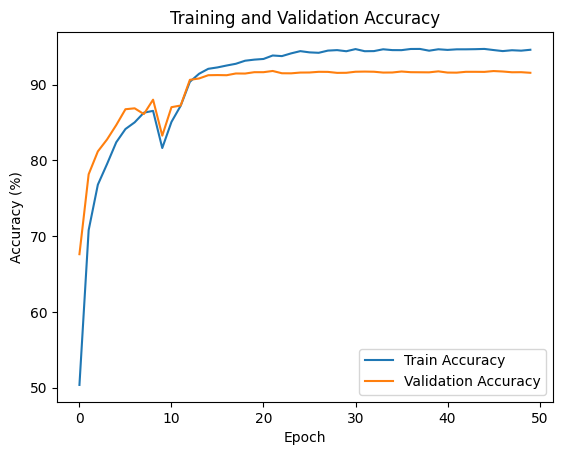

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet34
import matplotlib.pyplot as plt

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Modify the pre-trained ResNet34
model = resnet34(pretrained=True)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.fc = nn.Linear(512, 10)

model.layer4.add_module('dropout', nn.Dropout(0.5))

device = torch.device("mps")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

train_acc_list, test_acc_list = [], []

def train(epoch):
    model.train()
    train_loss, correct, total = 0, 0, 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    train_acc_list.append(acc)
    print(f'Epoch: {epoch}, Loss: {train_loss/len(train_loader)}, Train Accuracy: {acc}')

test_loss = 0

def test(epoch):
    model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    test_acc_list.append(acc)
    print(f'Epoch: {epoch}, Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {acc}')

for epoch in range(1, 51):
    train(epoch)
    test(epoch)
    scheduler.step(test_loss)

# Plotting
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


# Resnet34 v2

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Loss: 1.7818495846160538, Train Accuracy: 36.556
Epoch: 1, Test Loss: 1.4730376315116882, Test Accuracy: 48.19
Epoch: 2, Loss: 1.1471270438655259, Train Accuracy: 59.46
Epoch: 2, Test Loss: 1.0720161837339401, Test Accuracy: 62.05
Epoch: 3, Loss: 0.943392648416407, Train Accuracy: 67.238
Epoch: 3, Test Loss: 1.2743615382909774, Test Accuracy: 61.51
Epoch: 4, Loss: 0.7606910866544679, Train Accuracy: 73.758
Epoch: 4, Test Loss: 0.611120183467865, Test Accuracy: 79.17
Epoch: 5, Loss: 0.6520530723244943, Train Accuracy: 77.712
Epoch: 5, Test Loss: 0.7805465948581696, Test Accuracy: 74.23
Epoch: 6, Loss: 0.6001907359913486, Train Accuracy: 79.326
Epoch: 6, Test Loss: 0.6904529571533203, Test Accuracy: 77.97
Epoch: 7, Loss: 0.5831437598713829, Train Accuracy: 79.876
Epoch: 7, Test Loss: 0.5581856453418732, Test Accuracy: 80.43
Epoch: 8, Loss: 0.5485068102321966, Train Accuracy: 81.072
Epoch: 8, Test Loss: 

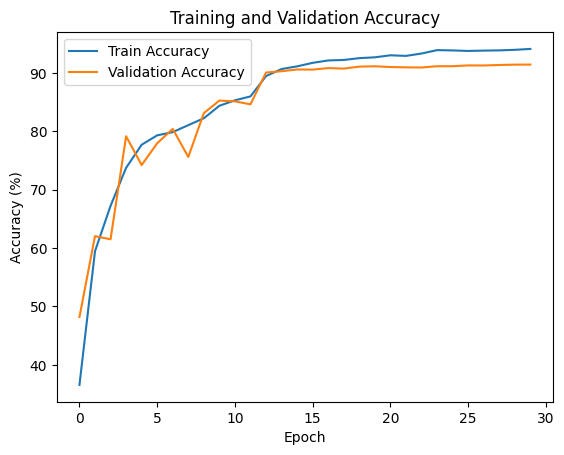

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet34
import matplotlib.pyplot as plt

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Modify the pre-trained ResNet34
model = resnet34(pretrained=True)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.fc = nn.Linear(512, 10)

model.layer4.add_module('dropout', nn.Dropout(0.5))

device = torch.device("mps")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.2, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

train_acc_list, test_acc_list = [], []

def train(epoch):
    model.train()
    train_loss, correct, total = 0, 0, 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    train_acc_list.append(acc)
    print(f'Epoch: {epoch}, Loss: {train_loss/len(train_loader)}, Train Accuracy: {acc}')

test_loss = 0

def test(epoch):
    model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    test_acc_list.append(acc)
    print(f'Epoch: {epoch}, Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {acc}')

for epoch in range(1, 31):
    train(epoch)
    test(epoch)
    scheduler.step(test_loss)

# Plotting
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


# Resnet34vs101

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30]
Train Loss: 1.0136, Train Acc: 64.94%
Validation Loss: 0.7248, Validation Acc: 74.93%
--------------------------------------------------
Epoch [2/30]
Train Loss: 0.6864, Train Acc: 76.19%
Validation Loss: 0.6082, Validation Acc: 79.66%
--------------------------------------------------
Epoch [3/30]
Train Loss: 0.5836, Train Acc: 79.87%
Validation Loss: 0.5831, Validation Acc: 79.62%
--------------------------------------------------
Epoch [4/30]
Train Loss: 0.5296, Train Acc: 81.64%
Validation Loss: 0.5599, Validation Acc: 80.62%
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.5766, Train Acc: 80.12%
Validation Loss: 0.5516, Validation Acc: 81.44%
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.4918, Train Acc: 83.16%
Validation Loss: 0.6164, Validation Acc: 79.60%
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.4644, Train Acc: 84.16%
Validation Loss: 0.5193, Validation Acc: 82.65%
-

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30]
Train Loss: 1.2215, Train Acc: 58.08%
Validation Loss: 1.1662, Validation Acc: 66.58%
--------------------------------------------------
Epoch [2/30]
Train Loss: 1.0217, Train Acc: 64.45%
Validation Loss: 1.3207, Validation Acc: 61.30%
--------------------------------------------------
Epoch [3/30]
Train Loss: 1.2996, Train Acc: 54.42%
Validation Loss: 1.1503, Validation Acc: 61.37%
--------------------------------------------------
Epoch [4/30]
Train Loss: 1.0215, Train Acc: 64.60%
Validation Loss: 1.1991, Validation Acc: 67.50%
--------------------------------------------------
Epoch [5/30]
Train Loss: 0.8261, Train Acc: 71.25%
Validation Loss: 0.6972, Validation Acc: 76.03%
--------------------------------------------------
Epoch [6/30]
Train Loss: 0.7236, Train Acc: 74.95%
Validation Loss: 0.6711, Validation Acc: 76.97%
--------------------------------------------------
Epoch [7/30]
Train Loss: 0.7448, Train Acc: 74.22%
Validation Loss: 0.6853, Validation Acc: 76.59%
-

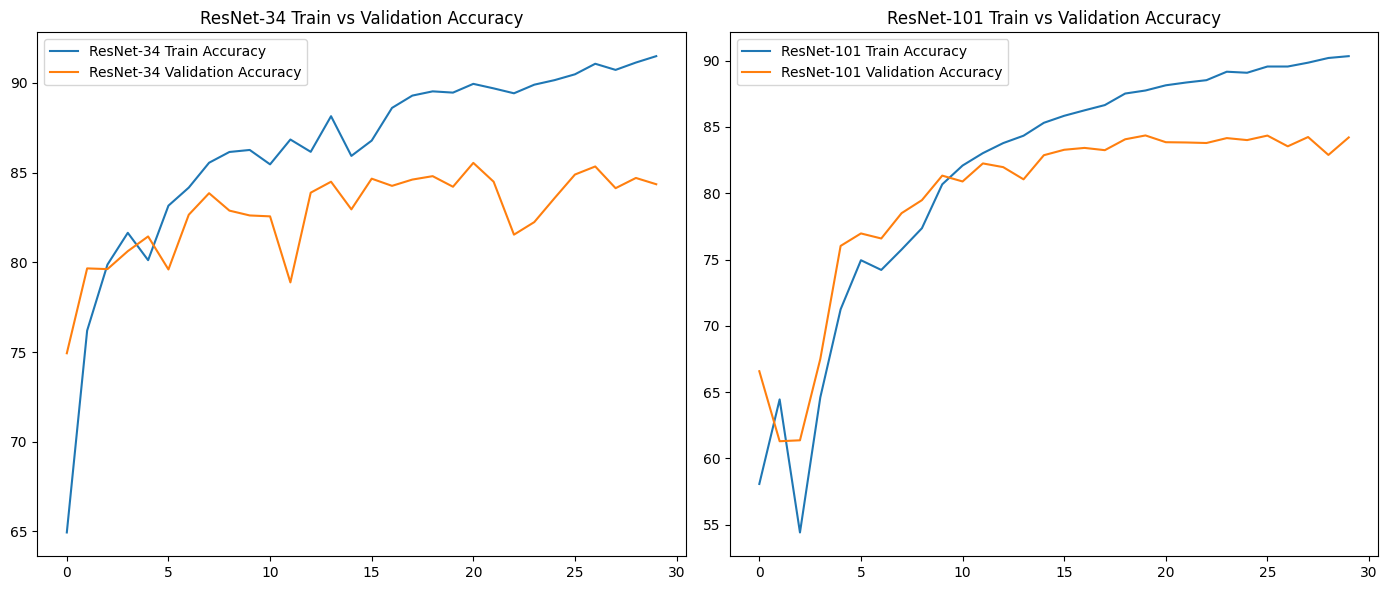

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet34, resnet101
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Dataset and DataLoader
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

device = torch.device('mps')

def train(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        _, predicted = outputs.max(1)
        total_correct += predicted.eq(targets).sum().item()
        total_samples += targets.size(0)
    avg_loss = total_loss / len(train_loader)
    avg_acc = 100.0 * total_correct / total_samples
    return avg_loss, avg_acc

def test(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_correct += predicted.eq(targets).sum().item()
            total_samples += targets.size(0)
    avg_loss = total_loss / len(test_loader)
    avg_acc = 100.0 * total_correct / total_samples
    return avg_loss, avg_acc

def setup_and_train(model_name, epochs=30):
    if model_name == 'resnet34':
        model = resnet34(pretrained=True)
    elif model_name == 'resnet101':
        model = resnet101(pretrained=True)
    
    model.fc = nn.Linear(model.fc.in_features, 10)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    
    # Scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        test_loss, test_acc = test(model, test_loader, criterion)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Validation Loss: {test_loss:.4f}, Validation Acc: {test_acc:.2f}%")
        print('-' * 50)
        
        # Update learning rate based on validation loss
        scheduler.step(test_loss)

    return train_accuracies, test_accuracies

resnet34_train_accs, resnet34_test_accs = setup_and_train('resnet34')
resnet101_train_accs, resnet101_test_accs = setup_and_train('resnet101')

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet34_train_accs, label='ResNet-34 Train Accuracy')
plt.plot(resnet34_test_accs, label='ResNet-34 Validation Accuracy')
plt.legend()
plt.title('ResNet-34 Train vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(resnet101_train_accs, label='ResNet-101 Train Accuracy')
plt.plot(resnet101_test_accs, label='ResNet-101 Validation Accuracy')
plt.legend()
plt.title('ResNet-101 Train vs Validation Accuracy')
plt.tight_layout()
plt.show()


# ResNet101

Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Loss: 1.5833127411735026, Train Accuracy: 44.846
Epoch: 1, Test Loss: 1.0900612491369248, Test Accuracy: 63.62
Epoch: 2, Loss: 0.9382337779949999, Train Accuracy: 67.516
Epoch: 2, Test Loss: 0.7695461505651474, Test Accuracy: 74.04
Epoch: 3, Loss: 0.7071900356303701, Train Accuracy: 75.69
Epoch: 3, Test Loss: 0.7470633351802826, Test Accuracy: 78.02
Epoch: 4, Loss: 0.5743956020116197, Train Accuracy: 80.164
Epoch: 4, Test Loss: 0.5019174283742904, Test Accuracy: 83.22
Epoch: 5, Loss: 0.5003696313065946, Train Accuracy: 82.918
Epoch: 5, Test Loss: 0.704654888510704, Test Accuracy: 75.55
Epoch: 6, Loss: 0.4548293644814845, Train Accuracy: 84.292
Epoch: 6, Test Loss: 0.4320374488830566, Test Accuracy: 85.13
Epoch: 7, Loss: 0.41981760124721185, Train Accuracy: 85.48
Epoch: 7, Test Loss: 0.6135555145144462, Test Accuracy: 80.59
Epoch: 8, Loss: 0.39702684723812603, Train Accuracy: 86.394
Epoch: 8, Test Loss

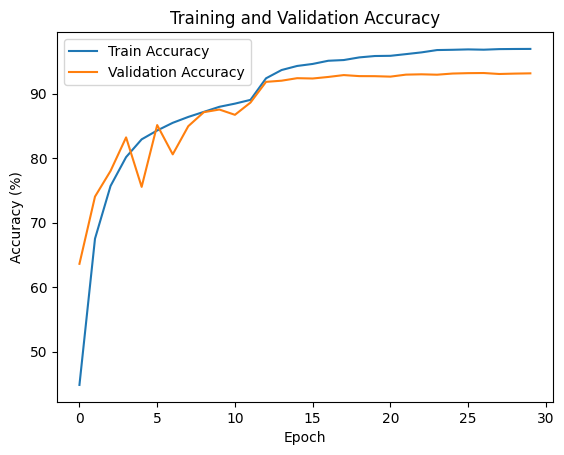

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet101
import matplotlib.pyplot as plt

# Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Modify the pre-trained ResNet101
model = resnet101(pretrained=True)
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
model.fc = nn.Linear(2048, 10)

model.layer4.add_module('dropout', nn.Dropout(0.5))

device = torch.device("mps")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.2, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

train_acc_list, test_acc_list = [], []

def train(epoch):
    model.train()
    train_loss, correct, total = 0, 0, 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    train_acc_list.append(acc)
    print(f'Epoch: {epoch}, Loss: {train_loss/len(train_loader)}, Train Accuracy: {acc}')

test_loss = 0

def test(epoch):
    model.eval()
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100.*correct/total
    test_acc_list.append(acc)
    print(f'Epoch: {epoch}, Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {acc}')

for epoch in range(1, 31):
    train(epoch)
    test(epoch)
    scheduler.step(test_loss)

# Plotting
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


# Densenet

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weig

Training DenseNet121...
Epoch: 0/20 | Train Loss: 0.9463 | Train Acc: 66.95% | Test Acc: 89.84%
Epoch: 1/20 | Train Loss: 0.6348 | Train Acc: 78.35% | Test Acc: 89.21%
Epoch: 2/20 | Train Loss: 0.5661 | Train Acc: 80.36% | Test Acc: 93.32%
Epoch: 3/20 | Train Loss: 0.5176 | Train Acc: 82.13% | Test Acc: 92.51%
Epoch: 4/20 | Train Loss: 0.4894 | Train Acc: 83.24% | Test Acc: 94.32%
Epoch: 5/20 | Train Loss: 0.4756 | Train Acc: 83.52% | Test Acc: 94.04%
Epoch: 6/20 | Train Loss: 0.4432 | Train Acc: 84.64% | Test Acc: 93.77%
Epoch: 7/20 | Train Loss: 0.4390 | Train Acc: 84.83% | Test Acc: 93.69%
Epoch: 8/20 | Train Loss: 0.4280 | Train Acc: 85.18% | Test Acc: 94.08%
Epoch: 9/20 | Train Loss: 0.4226 | Train Acc: 85.26% | Test Acc: 94.66%
Epoch: 10/20 | Train Loss: 0.4125 | Train Acc: 85.75% | Test Acc: 94.85%
Epoch: 11/20 | Train Loss: 0.3970 | Train Acc: 86.17% | Test Acc: 95.61%
Epoch: 12/20 | Train Loss: 0.3971 | Train Acc: 86.28% | Test Acc: 94.06%
Epoch: 13/20 | Train Loss: 0.3948 | T

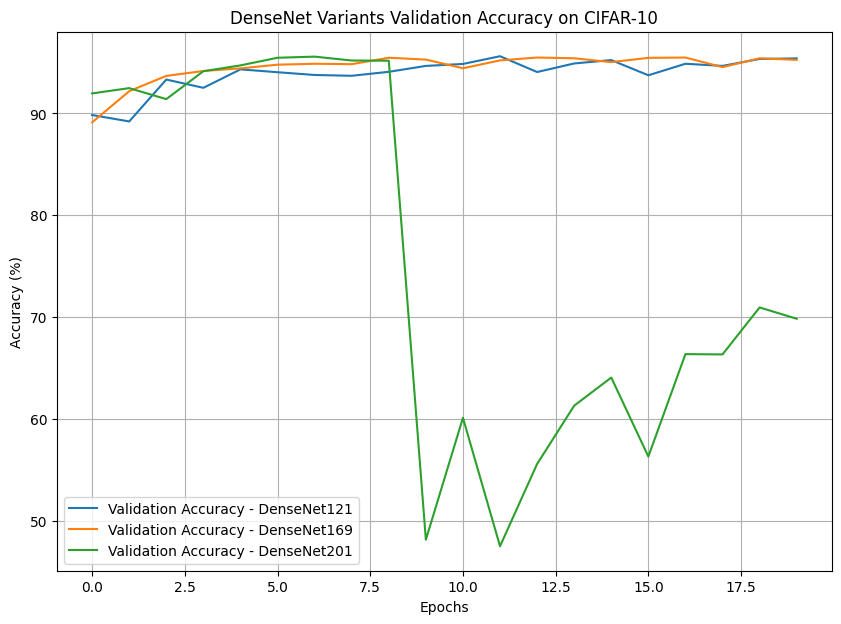

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device('mps')

# Data loading and preprocessing
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Densenet expects 224x224 input size
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalization params for pretrained models
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Adjust the final layer of Densenet for CIFAR10 and add dropout
def modify_densenet(model):
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(num_ftrs, 10)  # CIFAR10 has 10 classes
    )
    return model.to(device)

densenet121 = modify_densenet(models.densenet121(pretrained=True))
densenet169 = modify_densenet(models.densenet169(pretrained=True))
densenet201 = modify_densenet(models.densenet201(pretrained=True))

models_list = [densenet121, densenet169, densenet201]
model_names = ["DenseNet121", "DenseNet169", "DenseNet201"]

def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_acc = 100. * correct / total
    return running_loss / (batch_idx + 1), train_acc

def test(model, loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_acc = 100. * correct / total
    return test_loss / (batch_idx + 1), test_acc

def train_and_evaluate(models, epochs=20):
    all_test_accs = []

    for model, model_name in zip(models, ["DenseNet121", "DenseNet169", "DenseNet201"]):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

        test_accs = []
        print(f"Training {model_name}...")
        for epoch in range(epochs):
            train_loss, train_acc = train(model, train_loader, criterion, optimizer)
            _, test_acc = test(model, test_loader, criterion)
            test_accs.append(test_acc)
            scheduler.step(train_loss)
            print(f"Epoch: {epoch}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
        all_test_accs.append(test_accs)
        print("\n")
    return all_test_accs

test_accs_list = train_and_evaluate(models_list, epochs=20)

# Plotting the results
plt.figure(figsize=(10, 7))

for idx, model_name in enumerate(model_names):
    plt.plot(test_accs_list[idx], label=f'Validation Accuracy - {model_name}')

plt.legend()
plt.title("DenseNet Variants Validation Accuracy on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


# VGG

I accidentally pressed the run button again after the first run. As for the result you see below, it clearly shows some issue with VGG19 training process.
I write the report based on my recollction of the first time training data.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device('mps')

# Data loading and preprocessing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the required size
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Adjust the final layer of VGG for CIFAR10
def modify_vgg(model):
    # Replace the classifier with a new one for 10 classes
    model.classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),
        nn.ReLU(True),
        nn.Dropout(0.5),
        nn.Linear(4096, 10)  # CIFAR10 has 10 classes
    )
    return model.to(device)

vgg11 = modify_vgg(models.vgg11(pretrained=True))
vgg16 = modify_vgg(models.vgg16(pretrained=True))
vgg19 = modify_vgg(models.vgg19(pretrained=True))

models_list = [vgg11, vgg16, vgg19]
model_names = ["VGG11", "VGG16", "VGG19"]

def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_acc = 100. * correct / total
    return running_loss / (batch_idx + 1), train_acc

def test(model, loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_acc = 100. * correct / total
    return test_loss / (batch_idx + 1), test_acc

def train_and_evaluate(models, epochs=10):
    all_test_accs = []

    for model, model_name in zip(models, ["VGG11", "VGG16", "VGG19"]):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

        test_accs = []
        print(f"Training {model_name}...")
        for epoch in range(epochs):
            train_loss, train_acc = train(model, train_loader, criterion, optimizer)
            _, test_acc = test(model, test_loader, criterion)
            test_accs.append(test_acc)
            scheduler.step(train_loss)
            print(f"Epoch: {epoch}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
        all_test_accs.append(test_accs)
        print("\n")
    return all_test_accs

test_accs_list = train_and_evaluate(models_list, epochs=10)

# Plotting the results
plt.figure(figsize=(10, 7))

for idx, model_name in enumerate(model_names):
    plt.plot(test_accs_list[idx], label=f'Validation Accuracy - {model_name}')

plt.legend()
plt.title("VGG Variants Validation Accuracy on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_We

Training VGG11...
Epoch: 0/10 | Train Loss: 0.5856 | Train Acc: 79.82% | Test Acc: 87.78%
Epoch: 1/10 | Train Loss: 0.2823 | Train Acc: 90.33% | Test Acc: 89.37%
Epoch: 2/10 | Train Loss: 0.1969 | Train Acc: 93.29% | Test Acc: 90.46%
Epoch: 3/10 | Train Loss: 0.1418 | Train Acc: 95.16% | Test Acc: 90.91%
Epoch: 4/10 | Train Loss: 0.1095 | Train Acc: 96.19% | Test Acc: 91.75%
Epoch: 5/10 | Train Loss: 0.0792 | Train Acc: 97.38% | Test Acc: 89.52%
Epoch: 6/10 | Train Loss: 0.0657 | Train Acc: 97.77% | Test Acc: 91.60%
Epoch: 7/10 | Train Loss: 0.0545 | Train Acc: 98.18% | Test Acc: 90.82%
Epoch: 8/10 | Train Loss: 0.0407 | Train Acc: 98.62% | Test Acc: 91.28%
Epoch: 9/10 | Train Loss: 0.0438 | Train Acc: 98.58% | Test Acc: 91.75%


Training VGG16...
Epoch: 0/10 | Train Loss: 1.6166 | Train Acc: 40.85% | Test Acc: 68.15%
Epoch: 1/10 | Train Loss: 0.5919 | Train Acc: 79.48% | Test Acc: 86.70%
Epoch: 2/10 | Train Loss: 0.3335 | Train Acc: 88.61% | Test Acc: 87.51%
Epoch: 3/10 | Train Loss: 

KeyboardInterrupt: 

# Mobilenet

Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 0/10 | Train Loss: 155.0650 | Train Acc: 86.32% | Test Acc: 90.36%
Epoch: 1/10 | Train Loss: 69.5735 | Train Acc: 93.83% | Test Acc: 92.76%
Epoch: 2/10 | Train Loss: 51.9255 | Train Acc: 95.44% | Test Acc: 93.58%
Epoch: 3/10 | Train Loss: 41.9857 | Train Acc: 96.24% | Test Acc: 92.86%
Epoch: 4/10 | Train Loss: 32.5274 | Train Acc: 97.03% | Test Acc: 93.71%
Epoch: 5/10 | Train Loss: 30.3097 | Train Acc: 97.27% | Test Acc: 93.81%
Epoch: 6/10 | Train Loss: 24.3945 | Train Acc: 97.78% | Test Acc: 94.01%
Epoch: 7/10 | Train Loss: 20.9013 | Train Acc: 98.15% | Test Acc: 93.76%
Epoch: 8/10 | Train Loss: 20.0654 | Train Acc: 98.17% | Test Acc: 93.60%
Epoch: 9/10 | Train Loss: 18.3720 | Train Acc: 98.42% | Test Acc: 93.91%


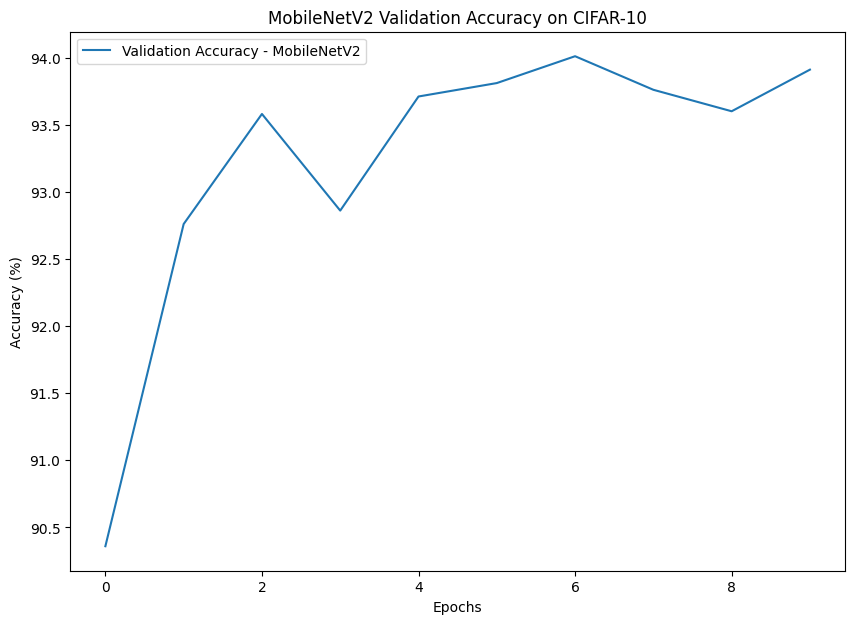

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device('mps')

# Data loading and preprocessing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the required size
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Load pretrained MobileNetV2 and modify for CIFAR-10
def modify_mobilenetv2(model):
    model.classifier[1] = nn.Linear(model.last_channel, 10)  # Modify the final fully connected layer for 10 classes
    return model.to(device)

mobilenetv2 = modify_mobilenetv2(models.mobilenet_v2(pretrained=True))

def train_and_evaluate(model, epochs=10):
    test_accs = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        _, test_acc = test(model, test_loader, criterion)
        test_accs.append(test_acc)
        scheduler.step(train_loss)
        print(f"Epoch: {epoch}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
    return test_accs

def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss, 100 * correct / total

def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss, 100 * correct / total

# Train and evaluate the MobileNetV2 model
test_accs = train_and_evaluate(mobilenetv2, epochs=10)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.plot(test_accs, label='Validation Accuracy - MobileNetV2')
plt.legend()
plt.title("MobileNetV2 Validation Accuracy on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.show()


# Efficientnet

Files already downloaded and verified
Files already downloaded and verified
Loaded pretrained weights for efficientnet-b0
Epoch: 0/10 | Train Loss: 183.9634 | Train Acc: 85.78% | Test Acc: 92.10%
Epoch: 1/10 | Train Loss: 60.1111 | Train Acc: 94.81% | Test Acc: 94.17%
Epoch: 2/10 | Train Loss: 39.6048 | Train Acc: 96.56% | Test Acc: 95.62%
Epoch: 3/10 | Train Loss: 27.5088 | Train Acc: 97.62% | Test Acc: 95.70%
Epoch: 4/10 | Train Loss: 21.2729 | Train Acc: 98.24% | Test Acc: 96.48%
Epoch: 5/10 | Train Loss: 16.4741 | Train Acc: 98.62% | Test Acc: 96.51%
Epoch: 6/10 | Train Loss: 13.2435 | Train Acc: 98.97% | Test Acc: 96.54%
Epoch: 7/10 | Train Loss: 12.1358 | Train Acc: 99.00% | Test Acc: 96.34%
Epoch: 8/10 | Train Loss: 9.9895 | Train Acc: 99.16% | Test Acc: 96.54%
Epoch: 9/10 | Train Loss: 9.4989 | Train Acc: 99.30% | Test Acc: 96.61%


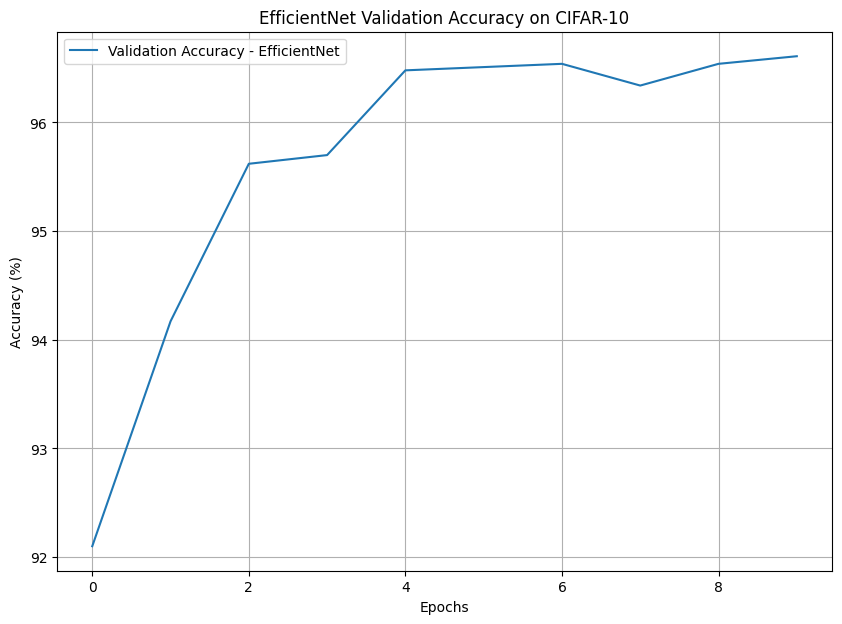

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from efficientnet_pytorch import EfficientNet

# Set device
device = torch.device('mps')

# Data loading and preprocessing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the required size
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Load pretrained EfficientNet and modify for CIFAR-10
def modify_efficientnet(model, num_classes=10):
    model._fc = nn.Linear(model._fc.in_features, num_classes)  # Modify the final fully connected layer for 10 classes
    return model.to(device)

efficientnet = modify_efficientnet(EfficientNet.from_pretrained('efficientnet-b0'))

def train_and_evaluate(model, epochs=10):
    test_accs = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    for epoch in range(epochs):
        train_loss, train_acc = train(model, train_loader, criterion, optimizer)
        _, test_acc = test(model, test_loader, criterion)
        test_accs.append(test_acc)
        scheduler.step(train_loss)
        print(f"Epoch: {epoch}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
    return test_accs

def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    total = 0
    correct = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    return running_loss, 100 * correct / total

def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    return running_loss, 100 * correct / total

# Train and evaluate the EfficientNet model
test_accs = train_and_evaluate(efficientnet, epochs=10)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.plot(test_accs, label='Validation Accuracy - EfficientNet')
plt.legend()
plt.title("EfficientNet Validation Accuracy on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


# Resnet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set device
device = torch.device('mps')

# Data loading and preprocessing
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the required size
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Load pretrained ResNet models and modify for CIFAR-10
def modify_resnet(model, num_classes=10):
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)  # Modify the final fully connected layer for 10 classes
    return model.to(device)

resnet18 = modify_resnet(models.resnet18(pretrained=True))
resnet50 = modify_resnet(models.resnet50(pretrained=True))
resnet101 = modify_resnet(models.resnet101(pretrained=True))

models_list = [resnet18, resnet50, resnet101]
model_names = ["ResNet-18", "ResNet-50", "ResNet-101"]

def train(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_acc = 100. * correct / total
    return running_loss / (batch_idx + 1), train_acc

def test(model, loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_acc = 100. * correct / total
    return test_loss / (batch_idx + 1), test_acc

def train_and_evaluate(models, epochs=10):
    all_test_accs = []

    for model, model_name in zip(models, model_names):
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

        test_accs = []
        print(f"Training {model_name}...")
        for epoch in range(epochs):
            train_loss, train_acc = train(model, train_loader, criterion, optimizer)
            _, test_acc = test(model, test_loader, criterion)
            test_accs.append(test_acc)
            scheduler.step(train_loss)
            print(f"Epoch: {epoch}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")
        all_test_accs.append(test_accs)
        print("\n")
    return all_test_accs

test_accs_list = train_and_evaluate(models_list, epochs=10)

# Plotting the results
plt.figure(figsize=(10, 7))

for idx, model_name in enumerate(model_names):
    plt.plot(test_accs_list[idx], label=f'Validation Accuracy - {model_name}')

plt.legend()
plt.title("ResNet Variants Validation Accuracy on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


Files already downloaded and verified
Files already downloaded and verified


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWa

Training ResNet-18...


python(92102) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(92107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(92527) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(92532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 0/10 | Train Loss: 0.3476 | Train Acc: 87.90% | Test Acc: 92.13%


python(92577) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(92582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93000) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93003) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 1/10 | Train Loss: 0.1386 | Train Acc: 95.30% | Test Acc: 93.75%


python(93044) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93426) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93429) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 2/10 | Train Loss: 0.0835 | Train Acc: 97.17% | Test Acc: 94.55%


python(93490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93880) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 3/10 | Train Loss: 0.0570 | Train Acc: 98.07% | Test Acc: 94.89%


python(93924) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(93929) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 4/10 | Train Loss: 0.0418 | Train Acc: 98.61% | Test Acc: 94.82%


python(94281) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94284) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 5/10 | Train Loss: 0.0267 | Train Acc: 99.19% | Test Acc: 94.21%


python(94736) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94741) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95149) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 6/10 | Train Loss: 0.0252 | Train Acc: 99.22% | Test Acc: 94.97%


python(95197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 7/10 | Train Loss: 0.0191 | Train Acc: 99.43% | Test Acc: 95.22%


python(95747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(95752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96167) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 8/10 | Train Loss: 0.0172 | Train Acc: 99.51% | Test Acc: 95.67%


python(96220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96225) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 9/10 | Train Loss: 0.0117 | Train Acc: 99.67% | Test Acc: 95.75%


Training ResNet-50...


python(96631) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(96636) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97686) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 0/10 | Train Loss: 0.3004 | Train Acc: 89.86% | Test Acc: 93.36%


python(97771) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(97776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99340) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 1/10 | Train Loss: 0.1132 | Train Acc: 96.05% | Test Acc: 93.83%


python(99437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(99442) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1331) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1336) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 2/10 | Train Loss: 0.0714 | Train Acc: 97.46% | Test Acc: 94.75%


python(1428) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(1437) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3260) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 3/10 | Train Loss: 0.0556 | Train Acc: 98.06% | Test Acc: 95.39%


python(3353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3358) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 4/10 | Train Loss: 0.0374 | Train Acc: 98.73% | Test Acc: 94.99%


python(5359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5364) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 5/10 | Train Loss: 0.0319 | Train Acc: 98.96% | Test Acc: 94.77%


python(7349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9188) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 6/10 | Train Loss: 0.0276 | Train Acc: 99.07% | Test Acc: 95.96%


python(9274) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11041) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 7/10 | Train Loss: 0.0251 | Train Acc: 99.17% | Test Acc: 94.98%


python(11131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(11136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 8/10 | Train Loss: 0.0280 | Train Acc: 99.09% | Test Acc: 95.37%


python(12733) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(12738) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 9/10 | Train Loss: 0.0184 | Train Acc: 99.43% | Test Acc: 95.60%


Training ResNet-101...


python(14571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(14576) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18334) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18337) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Epoch: 0/10 | Train Loss: 0.2602 | Train Acc: 91.18% | Test Acc: 95.06%


python(18487) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(18496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 